<a href="https://colab.research.google.com/github/avinashronanki/Analytics-4/blob/main/imdb_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/schema/IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# EDA

In [ ]:
len(df)

50000

In [ ]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

In [ ]:
df.sentiment.value_counts(normalize=True) * 100

negative    50.0
positive    50.0
Name: sentiment, dtype: float64

In [ ]:
df.iloc[1,0]

In [ ]:
# Remove all the break tags
df.review = df.review.apply(lambda x: x.replace('<br /><br />', ''))

In [ ]:
# Replace sentiments to binary 
df.sentiment = df.sentiment.replace({'positive': 1, 'negative': 0})

In [ ]:
df.dtypes

review       object
sentiment     int64
dtype: object

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. The filming tec...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


**Histogram plot of string length of Review column**

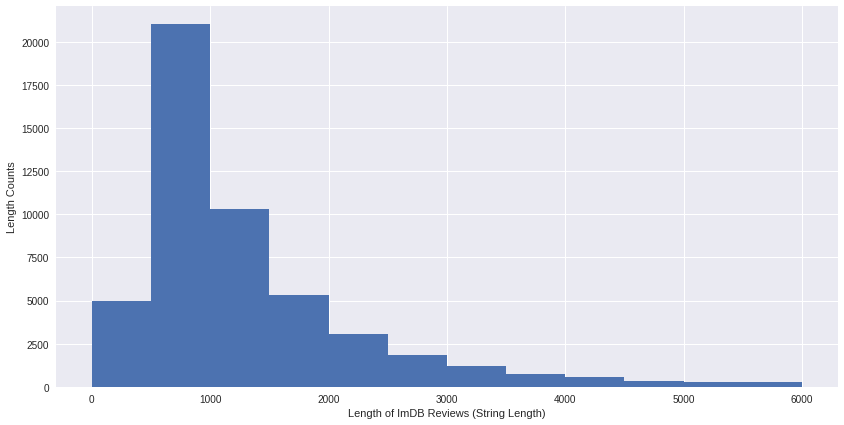

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize=(14,7))
bins = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000]
plt.xlabel('Length of ImDB Reviews (String Length)')
plt.ylabel('Length Counts')
plt.hist(df['review'].apply(lambda x: len(x)).tolist(), bins=bins)
plt.show()

# Data preparation (Train/Test Split)

In [ ]:
train_df = df.iloc[:40000]
test_df = df.iloc[40000:]

In [ ]:
len(train_df)

40000

In [ ]:
sentiment_label = train_df.sentiment.values # labels 

In [ ]:
df.review.str.len().mean()

1285.19726

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
reviews = train_df.review.values
tokenizer = Tokenizer(num_words=5000, lower=True)
tokenizer.fit_on_texts(reviews)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(reviews)

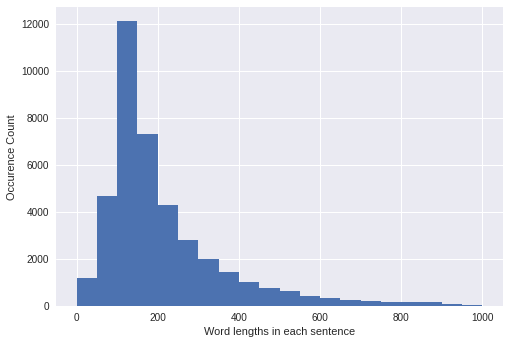

In [ ]:
import numpy as np
word_len = [len(v) for v in encoded_docs]
plt.xlabel('Word lengths in each sentence')
plt.ylabel('Occurence Count')
plt.hist(word_len, bins=[0,50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000])
plt.show()

In [ ]:
padded_sequence = pad_sequences(encoded_docs, maxlen=400) # padding 

In [ ]:
len(padded_sequence)

40000

In [ ]:
len(tokenizer.word_index)

112173

In [ ]:
print(tokenizer.word_index)

{'the': 1, 'and': 2, 'a': 3, 'of': 4, 'to': 5, 'is': 6, 'in': 7, 'it': 8, 'i': 9, 'this': 10, 'that': 11, 'was': 12, 'as': 13, 'for': 14, 'with': 15, 'movie': 16, 'but': 17, 'film': 18, 'on': 19, 'not': 20, 'you': 21, 'are': 22, 'his': 23, 'have': 24, 'be': 25, 'one': 26, 'he': 27, 'all': 28, 'at': 29, 'by': 30, 'an': 31, 'they': 32, 'so': 33, 'who': 34, 'from': 35, 'like': 36, 'or': 37, 'just': 38, 'her': 39, 'about': 40, 'out': 41, 'if': 42, "it's": 43, 'has': 44, 'some': 45, 'there': 46, 'what': 47, 'good': 48, 'more': 49, 'when': 50, 'very': 51, 'up': 52, 'no': 53, 'time': 54, 'my': 55, 'even': 56, 'would': 57, 'she': 58, 'which': 59, 'only': 60, 'really': 61, 'see': 62, 'story': 63, 'their': 64, 'can': 65, 'had': 66, 'me': 67, 'well': 68, 'were': 69, 'than': 70, 'much': 71, 'we': 72, 'bad': 73, 'get': 74, 'been': 75, 'great': 76, 'do': 77, 'will': 78, 'other': 79, 'also': 80, 'people': 81, 'into': 82, 'because': 83, 'how': 84, 'him': 85, 'first': 86, 'most': 87, "don't": 88, 'made

In [ ]:
print(reviews[5])
print(encoded_docs[5])

Probably my all-time favorite movie, a story of selflessness, sacrifice and dedication to a noble cause, but it's not preachy or boring. It just never gets old, despite my having seen it some 15 or more times in the last 25 years. Paul Lukas' performance brings tears to my eyes, and Bette Davis, in one of her very few truly sympathetic roles, is a delight. The kids are, as grandma says, more like "dressed-up midgets" than children, but that only makes them more fun to watch. And the mother's slow awakening to what's happening in the world and under her own roof is believable and startling. If I had a dozen thumbs, they'd all be "up" for this movie.
[238, 55, 28, 54, 514, 16, 3, 63, 4, 4077, 2, 5, 3, 3524, 1131, 17, 43, 20, 37, 346, 8, 38, 110, 213, 154, 459, 55, 261, 106, 8, 45, 1090, 37, 49, 211, 7, 1, 234, 2422, 152, 839, 241, 972, 1690, 5, 55, 511, 2, 3912, 2133, 7, 26, 4, 39, 51, 170, 370, 2205, 585, 6, 3, 3067, 1, 354, 22, 13, 543, 49, 36, 1870, 52, 70, 464, 17, 11, 60, 163, 93, 4

In [ ]:
print(padded_sequence[0])

# Model traning 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.layers import Embedding
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
#from tensorflow.compat.v1.keras.layers import CuDNNLSTM
from tensorflow.keras import layers
from tensorflow.keras import activations
embedding_vector_length = 32

model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=400))

model.add(SpatialDropout1D(0.25))

model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))

model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

# Callbacks
es = EarlyStopping(monitor='val_loss', patience=5)
model_ckp = ModelCheckpoint('/content/drive/MyDrive/schema/best_model.h5', save_best_only=True, monitor='val_loss', mode='auto')

model.compile(loss='binary_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

print(model.summary())

**Training**

In [ ]:
history = model.fit(padded_sequence,
                   sentiment_label,
                   validation_split=0.2,
                   callbacks=[es, model_ckp],
                   epochs=20,
                   batch_size=32)

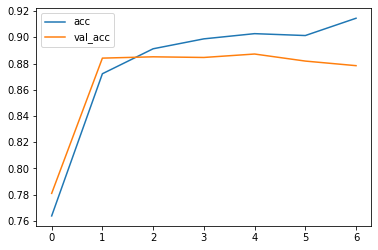

In [ ]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

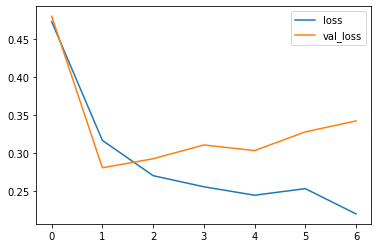

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

**Evaluation**

In [ ]:
test_reviews = test_df.review.values

test_encoded_docs = tokenizer.texts_to_sequences(test_reviews)
test_padded_sequence = pad_sequences(test_encoded_docs, maxlen=400)
test_sentiment_label = test_df.sentiment.values

In [ ]:
eval = model.evaluate(test_padded_sequence,
                      test_sentiment_label,
                      batch_size=32)

**Saving Tokenizer**

In [ ]:
import json
tokenizer_json = tokenizer.to_json()
with open('/content/drive/MyDrive/schema/tokenizer.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(tokenizer_json, ensure_ascii=False))

**Single Review Prediction**

In [ ]:
from keras.preprocessing.text import tokenizer_from_json
from keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import json
import os

def load_tokenizer(path):
    with open(os.path.join(path,'/content/drive/MyDrive/schema/tokenizer.json')) as f:
        data = json.load(f)
        loaded_tokenizer = tokenizer_from_json(data)
    return loaded_tokenizer

def preprocess_input(text_input, tokenizer):
    trs = tokenizer.texts_to_sequences([text_input])
    trs = pad_sequences(trs, maxlen=400)
    return trs

def predict_sentiment(model, encoded_input):
    prediction = model.predict(encoded_input).round().item()
    if prediction == 1:
        return 'positive'
    else:
        return 'negative'


if __name__ == '__main__':
    review_sent = "I watched 'The Crown' yesterday and it was  fucking  fantastic movie!"
    
    path = '/content/drive/MyDrive/schema/best_model.h5'
    tokenizer = load_tokenizer(path)
    
    loaded_model = load_model(os.path.join(path,'/content/drive/MyDrive/schema/best_model.h5'))
    encoded_input = preprocess_input(review_sent, tokenizer)
    
    sentiment = predict_sentiment(loaded_model, encoded_input)
    print(sentiment)

positive


# Simple NN model 

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
from keras.utils import to_categorical
from keras import models
from keras import layers

In [ ]:
from keras.datasets import imdb
(training_data, training_targets), (testing_data, testing_targets) = imdb.load_data(num_words=10000)
data = np.concatenate((training_data, testing_data), axis=0)
targets = np.concatenate((training_targets, testing_targets), axis=0)

In [ ]:
print("Categories:", np.unique(targets))
print("Number of unique words:", len(np.unique(np.hstack(data))))


length = [len(i) for i in data]
print("Average Review length:", np.mean(length))
print("Standard Deviation:", round(np.std(length)))

In [ ]:
print("Label:", targets[0])


print(data[0])

Label: 1
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [ ]:
index = imdb.get_word_index()
reverse_index = dict([(value, key) for (key, value) in index.items()]) 
decoded = " ".join( [reverse_index.get(i - 3, "*") for i in data[0]] )
print(decoded) 


In [ ]:
def vectorize(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
    return results

In [ ]:
data = vectorize(data)
targets = np.array(targets).astype("float32")

In [ ]:
test_x = data[:10000]
test_y = targets[:10000]
train_x = data[10000:]
train_y = targets[10000:]

In [ ]:
model = models.Sequential()
# Input - Layer
model.add(layers.Dense(50, activation = "relu", input_shape=(10000, )))
# Hidden - Layers
model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
model.add(layers.Dropout(0.2, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
# Output- Layer
model.add(layers.Dense(1, activation = "sigmoid"))
model.summary()

In [ ]:
model.compile(
 optimizer = "adam",
 loss = "binary_crossentropy",
 metrics = ["accuracy"]
)

In [ ]:
results = model.fit(
 train_x, train_y,
 epochs= 2,
 batch_size = 500,
 validation_data = (test_x, test_y)
)


In [ ]:
print(np.mean(results.history["val_accuracy"]))

0.49470001459121704


In [ ]:
import numpy as np
from keras.utils import to_categorical
from keras import models
from keras import layers
from keras.datasets import imdb
(training_data, training_targets), (testing_data, testing_targets) = imdb.load_data(num_words=10000)
data = np.concatenate((training_data, testing_data), axis=0)
targets = np.concatenate((training_targets, testing_targets), axis=0)
def vectorize(sequences, dimension = 10000):
 results = np.zeros((len(sequences), dimension))
 for i, sequence in enumerate(sequences):
  results[i, sequence] = 1
 return results
 
data = vectorize(data)
targets = np.array(targets).astype("float32")
test_x = data[:10000]
test_y = targets[:10000]
train_x = data[10000:]
train_y = targets[10000:]
model = models.Sequential()
# Input - Layer
model.add(layers.Dense(50, activation = "relu", input_shape=(10000, )))
# Hidden - Layers
model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
model.add(layers.Dropout(0.2, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
# Output- Layer
model.add(layers.Dense(1, activation = "sigmoid"))
model.summary()
# compiling the model
model.compile(
    optimizer = "adam",
    loss = "binary_crossentropy",
    metrics = ["accuracy"])
results = model.fit(
    train_x, train_y,
    epochs= 2,
    batch_size = 500,
    validation_data = (test_x, test_y))
# accuracy = results.history['accuracy']
# val_accuracy = results.history['val_acccuracy']
print("Train-Accuracy:", np.mean(results.history["accuracy"]))
print("Test-Accuracy:", np.mean(results.history["val_accuracy"]))

# RNN

In [1]:
from keras.datasets import imdb

In [ ]:
vocabulary_size = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = vocabulary_size)
print('Loaded dataset with {} training samples, {} test samples'.format(len(X_train), len(X_test)))

In [ ]:
print('---review---')
print(X_train[6])
print('---label---')
print(y_train[6])

In [ ]:
word2id = imdb.get_word_index()
id2word = {i: word for word, i in word2id.items()}
print('---review with words---')
print([id2word.get(i, ' ') for i in X_train[6]])
print('---label---')
print(y_train[6])

In [4]:
print('Maximum review length: {}'.format(
len(max((X_train + X_test), key=len))))

Maximum review length: 2697


In [5]:
print('Minimum review length: {}'.format(
len(min((X_test + X_test), key=len))))

Minimum review length: 14


In [6]:
from keras.preprocessing import sequence
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

In [ ]:
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout,SimpleRNN,GRU
embedding_size=32
model=Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model.add(SimpleRNN(128)) # you can use RNN as well 
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

In [9]:
model.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])

In [ ]:
batch_size = 64
num_epochs = 3
X_valid, y_valid = X_train[:batch_size], y_train[:batch_size]
X_train2, y_train2 = X_train[batch_size:], y_train[batch_size:]
model.fit(X_train2, y_train2, validation_data=(X_valid, y_valid), batch_size=batch_size, epochs=num_epochs)

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', scores[1])

Test accuracy: 0.7957599759101868


# GRU

In [ ]:
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout,SimpleRNN,GRU
embedding_size=32
model=Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model.add(GRU(256, return_sequences=True))  
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

In [ ]:
model.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])

In [ ]:
batch_size = 64
num_epochs = 3
X_valid, y_valid = X_train[:batch_size], y_train[:batch_size]
X_train2, y_train2 = X_train[batch_size:], y_train[batch_size:]
model.fit(X_train2, y_train2, validation_data=(X_valid, y_valid), batch_size=batch_size, epochs=num_epochs)

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', scores[1])

rnn 0.79
GRU 0.79
*italicized text*


loss is decreasing can be trained for more epocs, how ever it quite expensive so choosed not to.

# Datasets

In [ ]:
!pip install -q tfds-nightly tensorflow matplotlib

     |████████████████████████████████| 3.7MB 8.7MB/s 


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

import tensorflow_datasets as tfds